In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_df = pd.read_csv("/kaggle/input/housedata/data.csv")

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
raw_df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# raw_df.describe()

## preprocessing

In [ ]:
df = raw_df

In [ ]:
# df = df.drop(['street','country','city','statezip'],axis = 1,errors = 'ignore')
# df = pd.get_dummies(df, columns=['statezip'], drop_first=True)

In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.year
df['house_age'] = df.apply(
    lambda row: row['date'] - row['yr_built'] if row['yr_renovated'] == 0 else row['date'] - row['yr_renovated'],
    axis=1
)
df = df.drop(['date','yr_built','yr_renovated'],axis = 1,errors = 'ignore')
# df = pd.get_dummies(df, columns=['yr_renovated'], drop_first=True)

In [ ]:
# df.price.hist()

# EDA

In [ ]:
numcol = df.select_dtypes(include='number').columns.tolist()
print(f"Numeric columns: {numcol}")

Numeric columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'house_age']


In [ ]:

for col in numcol:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)  
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<Axes: >

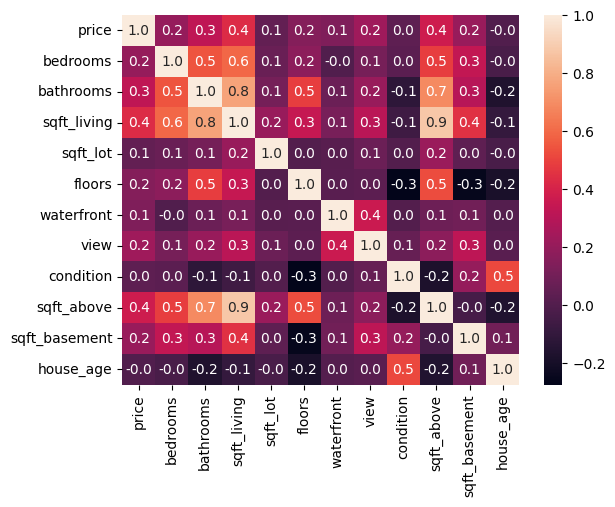

In [ ]:
sns.heatmap(df[numcol].corr(),annot = True,fmt = '.1f')

In [ ]:
# df.drop(['house_age','condition','waterfront','sqft_lot'],axis = 1,inplace = True, errors = 'ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import (
    LinearRegression,
    BayesianRidge,
)

# Support Vector Regression
from sklearn.svm import SVR

# Decision Trees and Ensemble Methods
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    XGBRegressor
)

from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# encoder = StandardScaler()
# # pca = PCA(n_components=0.95)
# X = encoder.fit_transform(X)
# for i in range(X_pca.shape[1]):
#     df[f'pca_{i+1}'] = X_pca[:, i]

# # 6. Drop original features used in PCA
# df.drop(columns=columns, inplace=True)



In [ ]:
df = raw_df
df = df.drop(columns=["id", "date", "street", "country"], errors='ignore')

# Drop rows with missing or zero price
df = df[df['price'] > 0]

# Separate features and target
X = df.drop(columns=["price"])
y = df["price"]

# Preprocess features
X = pd.get_dummies(X, drop_first=True)  # one-hot encode categoricals

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
skewness = df['price'].skew()
print(f"Raw target skewness: {skewness:.2f}")
high_vals = df['price'] > df['price'].quantile(0.99)
print(f"Top 1% count: {high_vals.sum()}")
print(df['price'][high_vals].describe())
# df['price'] = np.log1p(df[price])

Raw target skewness: 25.02
Top 1% count: 46
count    4.600000e+01
mean     3.418114e+06
std      3.903789e+06
min      2.027000e+06
25%      2.241666e+06
50%      2.400000e+06
75%      2.737500e+06
max      2.659000e+07
Name: price, dtype: float64


In [ ]:
models = {
        "Linear": LinearRegression(),
        "SVR": SVR(),
        "RandomForest": RandomForestRegressor(),
        "GradientBoosting": GradientBoostingRegressor(),
        "XGBoost": XGBRegressor(),
        "BayesianRidge": BayesianRidge(),
        "MLPRegressor":MLPRegressor()
}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print(results_df)

                            MAE           MSE          R2
GradientBoosting  123354.197439  4.776704e+10    0.678921
XGBoost           107924.209373  6.153189e+10    0.586397
BayesianRidge     172098.951760  6.805339e+10    0.542561
MLPRegressor      176191.098506  7.322594e+10    0.507792
SVR               232646.714409  1.572599e+11   -0.057064
RandomForest      126173.344692  2.181836e+11   -0.466579
Linear            367630.142112  2.146492e+13 -143.282230


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# FineTune

In [ ]:
# ------ 1. Linear Regression ------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# ------ 2. XGBoost with log-transformed target ------
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
xgb_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train_log)
y_pred_xgb_log = xgb_model.predict(X_test)
y_pred_xgb = np.expm1(y_pred_xgb_log)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# ------ 3. Neural Network (MLP) ------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
r2_mlp = r2_score(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)

# Output scores
{
    "Linear Regression": {"R²": round(r2_lr, 3), "RMSE": int(rmse_lr)},
    "XGBoost (log target)": {"R²": round(r2_xgb, 3), "RMSE": int(rmse_xgb)},
    "MLP Regressor": {"R²": round(r2_mlp, 3), "RMSE": int(rmse_mlp)},
}

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Linear Regression': {'R²': -143.282, 'RMSE': 4633025},
 'XGBoost (log target)': {'R²': 0.622, 'RMSE': 237044},
 'MLP Regressor': {'R²': 0.718, 'RMSE': 204989}}